In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer


In [23]:
dataset = pd.read_csv('Data.csv')

print(dataset.info())
print(dataset.describe(include='all'))
print(dataset)





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes
None
       Country        Age        Salary Purchased
count       10   9.000000      9.000000        10
unique       3        NaN           NaN         2
top     France        NaN           NaN        No
freq         4        NaN           NaN         5
mean       NaN  38.777778  63777.777778       NaN
std        NaN   7.693793  12265.579662       NaN
min        NaN  27.000000  48000.000000       NaN
25%        NaN  35.000000  54000.000000       NaN
50%        NaN  38.000000  61000.000000       NaN
75%        NaN  44.000000  72000.000000       NaN
max        NaN  50.000000  83000.000000       N

In [24]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
dataset[['Age', 'Salary']] = imputer.fit_transform(dataset[['Age', 'Salary']])

In [25]:
dataset.isnull().values.any()

np.False_

In [26]:
features = dataset.iloc[:, :-1].values
labels = dataset.iloc[:, -1].values

<Axes: xlabel='Salary', ylabel='Count'>

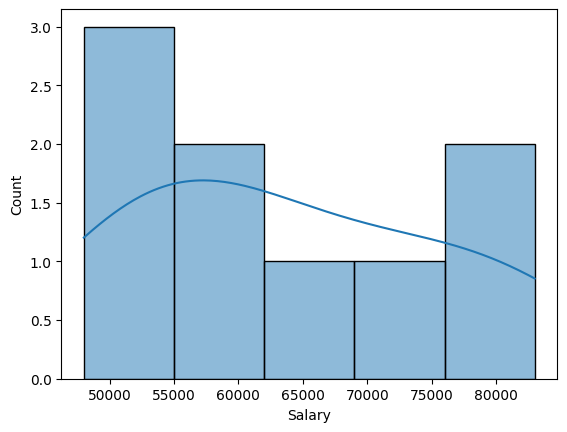

In [17]:
sns.histplot(dataset['Salary'], kde=True, bins=5)

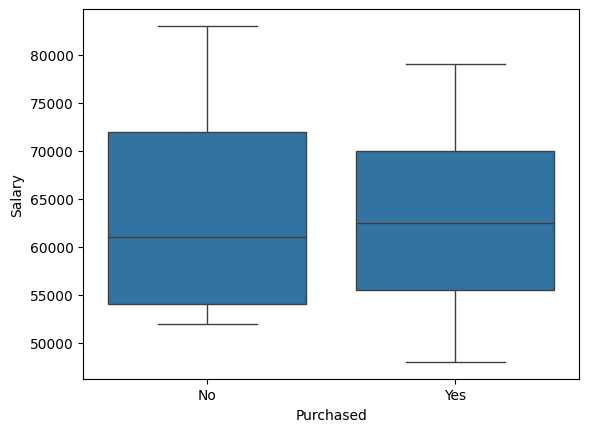

In [18]:
sns.boxplot(x='Purchased', y='Salary', data=dataset)
plt.show()

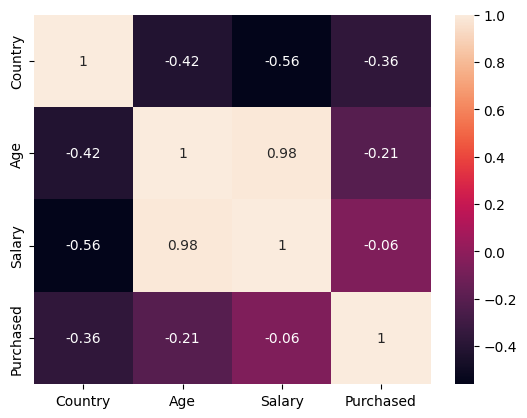

In [21]:
dataset_encoded = dataset.copy()
dataset_encoded['Purchased'] = dataset_encoded['Purchased'].map({'Yes':1, 'No':0})
dataset_encoded['Country'] = dataset_encoded['Country'].astype('category').cat.codes

sns.heatmap(dataset_encoded.corr(), annot=True)
plt.show()


In [33]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), ['Country'])], remainder='passthrough'
)
X = ct.fit_transform(dataset[['Country', 'Age', 'Salary']])
Y = LabelEncoder().fit_transform(dataset['Purchased'])


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.5, random_state=42)

In [47]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_Train)

LogisticRegression(max_iter=1000)

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_Test)

print(f"Predictions: {y_pred}")
print(f"Accuracy: {accuracy_score(Y_Test, y_pred)}")
print("Confusion Matrix:\n", confusion_matrix(Y_Test, y_pred))
print("Classification Report:\n", classification_report(Y_Test, y_pred))

Predictions: [1 0 0 1 1]
Accuracy: 0.2
Confusion Matrix:
 [[0 2]
 [2 1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      0.33      0.33         3

    accuracy                           0.20         5
   macro avg       0.17      0.17      0.17         5
weighted avg       0.20      0.20      0.20         5

